In [1]:
#Building a Sentiment analysis model on textual data with reference to internship task-4
#Study on Drug.csv data
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets # Interactive analysis
from ipywidgets import interact
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('fivethirtyeight') #plt.style.available
df= pd.read_csv('drug.csv')
print("The shape of dataset is:",df.shape)


The shape of dataset is: (161297, 7)


In [2]:
df.head()


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
#Lets explore important columns of dataset
print("Number of unique drugs present in dataset:",df['drugName'].nunique())


Number of unique drugs present in dataset: 3436


In [4]:
print("Number of unique medical conditions present in dataset:",df['condition'].nunique())


Number of unique medical conditions present in dataset: 884


In [5]:
print("\nThe Time period of collecting the data")
print("starting date:",df['date'].min())
print("Ending date:",df['date'].max())



The Time period of collecting the data
starting date: 1-Apr-08
Ending date: 9-Sep-17


In [6]:
#Next dataset is being summarized
df[['rating','usefulCount']].describe()


,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [7]:
df[['drugName','condition','review']].describe(include='object')


,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [8]:
df.isnull().sum()


uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [9]:
#delete all records where condition is not present
df= df.dropna()
#check missing values now
df.isnull().sum().sum()


0

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


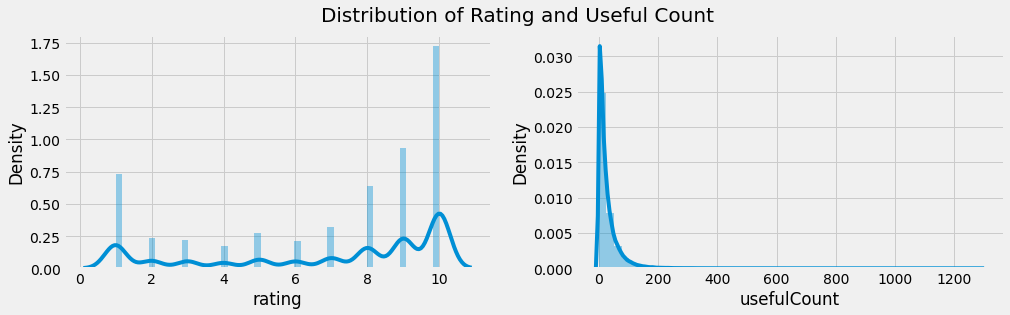

In [11]:
#Checking rating distribution from the dataset
plt.rcParams['figure.figsize']=(15,4)
plt.subplot(1,2,1)
sns.distplot(df['rating'])
plt.subplot(1,2,2)
sns.distplot(df['usefulCount'])
plt.suptitle('Distribution of Rating and Useful Count\n',fontsize=20)
plt.show()


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


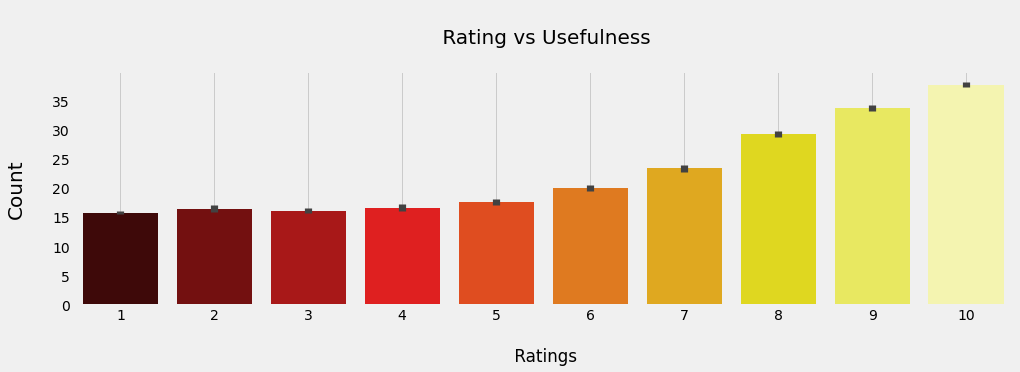

In [12]:
#checking impact of ratings on usefulCount
plt.rcParams['figure.figsize']=(15,4)
sns.barplot(df['rating'],df['usefulCount'],palette='hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n',fontsize=20)
plt.title('\n Rating vs Usefulness\n',fontsize=20)
plt.show()


In [14]:
#checking whether length of review has any input on ratings of drugs for that we need to create a new column to calculate length of reviews
df['len']=df['review'].apply(len)
#lets check impact of length of reviews on Ratings
df[['rating','len']].groupby(['rating']).agg(['min','mean','max'])
#Checking highest length review
print("length of longest review",df['len'].max())



length of longest review 10787


In [6]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets # Interactive analysis
from ipywidgets import interact
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('fivethirtyeight') #plt.style.available
df= pd.read_csv('drug.csv')
print("The shape of dataset is:",df.shape)



The shape of dataset is: (161297, 7)


In [7]:
min_rating= df['rating'].min()
max_rating= df['rating'].max()


In [ ]:
def scale_rating(rating):
    rating= min_rating
    rating= rating/(max_rating-1)
    rating*=5
    rating= int(round(rating,0))
    if(int(rating)==0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
    df['eff_score']=df['rating'].apply(scale_rating)
#lets calculate usefulness score
df['usefulness']=df['rating']*df['usefulCount']*df['eff_score']
#lets check top 10 most useful drugs withrespective conditions
df[['drugName','condition','usefulness']][df['usefulness']>df['usefulness'].mean()].sort_values(by='usefulness',ascending=False).head(10).reset_index(drop=True)

#Analyzing medical conditions
def check(condition=list(df['condition'].value_counts().index)):
    return df[df['condition']==condition]['eff_score'].value_counts()

popular_conditions=('BirthControl','Depression','Pain','Anxiety','Acne','Bipolar Disorder','Insomnia','ADHD','Diabetes','Emergency contraception','High Blood Pressure')
condition= df.iloc[df['condition'].isin(popular_conditions)]
sns.boxplot(x=conditions['condition'],y=conditions['rating'],hue=df['eff_score'])
plt.title('conditions vs effective number of drugs')
plt.xticks(rotation=90)
plt.ylabel('')
plt.show()
